# Continuous Probabalistic Methods

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exercises

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(df, multiplier):
    #Calculate Q1 value
    q1 = df.quantile(0.25)
    #Calculate Q3 value
    q3 = df.quantile(0.75)
    #Calculate interquartile range value
    iqr = q3 - q1
    
    #Lower Bound
    inner_lower_fence = q1 - (multiplier * iqr)
    
    #Upper bound
    inner_upper_fence = q3 + (multiplier * iqr)
    
    return inner_lower_fence, inner_upper_fence

## Part 1

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
lemonade = pd.read_csv(url)
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Using lemonade.csv dataset and focusing on continuous variables:

### A

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [4]:
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(lemonade, 1.5)

In [5]:
inner_lower_fence

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [6]:
inner_upper_fence

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

In [7]:
lower_outliers = {}
for col in lemonade.select_dtypes(np.number).columns:
    lower_outliers[col] = pd.DataFrame(lemonade[lemonade[col] < inner_lower_fence[col]])    

In [8]:
lower_outliers

{'Temperature':          Date     Day  Temperature  Rainfall  Flyers  Price  Sales
 364  12/31/17  Sunday         15.1       2.5       9    0.5      7,
 'Rainfall': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
 'Flyers':          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
 324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20,
 'Price': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
 'Sales': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: []}

There are two lower outliers in the dataset. One for `Temperature`:

In [9]:
lower_outliers['Temperature']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


And one for `Flyers`:

In [10]:
lower_outliers['Flyers']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


Let's see if these outliers make sense in the context of our data.

In [11]:
lemonade.sort_values(by = "Temperature").head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12


The `Temperature` outlier looks like just a particularly cold day, which isn't that unusual for December.

In [12]:
lemonade.sort_values(by = "Flyers").head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
27,1/28/17,Saturday,34.9,1.33,15,0.5,13


The `Flyers` outlier is the only negative value in the `Flyers` column. I am not sure what it means to have distributed a negative amount of Flyers. I would recommend dropping this outlier.

### B

Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [13]:
upper_outliers = {}
for col in lemonade.select_dtypes(np.number).columns:
    upper_outliers[col] = pd.DataFrame(lemonade[lemonade[col] > inner_upper_fence[col]])

In [14]:
upper_outliers['Temperature']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


The outlier in the Temperature `dataset` far exceeds the highest recordest temperature in the history of the world (regardless of whether the data in Celcius of Farenheit). This datapoint is likely in an error and likely should be deleted.

In [15]:
upper_outliers['Rainfall']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [16]:
upper_outliers['Flyers']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


In [17]:
upper_outliers['Price']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [18]:
upper_outliers['Sales']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


Besides `Temperature`, the other datapoints seem reasonable. Exceptionally rainy days, for example, are not unreasonable. Therefore, we will keep the other features in the dataset. 

### C 

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?

In [19]:
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(lemonade, 3)

In [20]:
lower_outliers = {}
for col in lemonade.select_dtypes(np.number).columns:
    lower_outliers[col] = pd.DataFrame(lemonade[lemonade[col] < inner_lower_fence[col]])    

In [21]:
lower_outliers

{'Temperature': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
 'Rainfall': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
 'Flyers':          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
 324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20,
 'Price': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
 'Sales': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: []}

Using the 3 multiplier value, we have only one outlier, which is the `Flyer` column.

In [22]:
lower_outliers['Flyers']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


This is the same outlier we saw earlier. This is the only negative value for flyers. This value is likely a mistake. 

### D 

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?

In [24]:
upper_outliers = {}
for col in lemonade.select_dtypes(np.number).columns:
    upper_outliers[col] = pd.DataFrame(lemonade[lemonade[col] > inner_upper_fence[col]])    

In [25]:
upper_outliers

{'Temperature':        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
 41  2/11/17  Saturday        212.0      0.91      35    0.5     21,
 'Rainfall':          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
 0      1/1/17   Sunday         27.0      2.00      15    0.5     10
 338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
 343  12/10/17   Sunday         31.3      1.82      15    0.5     11
 364  12/31/17   Sunday         15.1      2.50       9    0.5      7,
 'Flyers': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
 'Price': Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
 'Sales':        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
 181  7/1/17  Saturday        102.9      0.47      59    0.5    143
 182  7/2/17    Sunday         93.4      0.51      68    0.5    158
 183  7/3/17    Monday         81.5      0.54      68    0.5    23

Using the 3 multiplier, we have outliers in all column except `Flyers` and `Price`.

In [26]:
upper_outliers['Temperature']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


This is the same temperature outlier we saw earlier. This temperature value is likely and error. We should remove it from our DataFrame.

In [27]:
upper_outliers['Rainfall']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


The rainfall outliers are all reasonable. We should keep them in our DataFrame.

In [28]:
upper_outliers['Sales']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


The outliers for sales may just be days that received a lot of sales. We can keep these values in our dataset.

## Part 2

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
   
   - Use a 2 sigma decision rule to isolate the outliers. 
        - Do these make sense?
        - Should certain outliers be kept or removed?

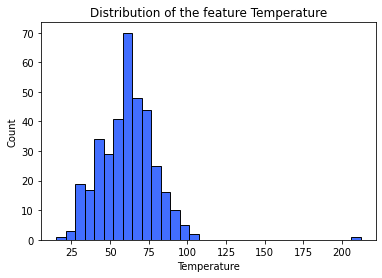

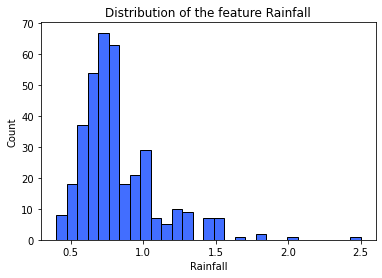

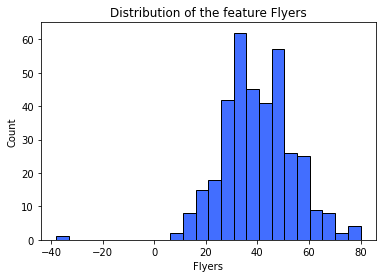

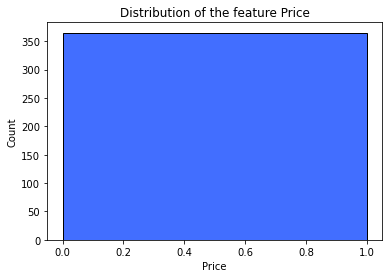

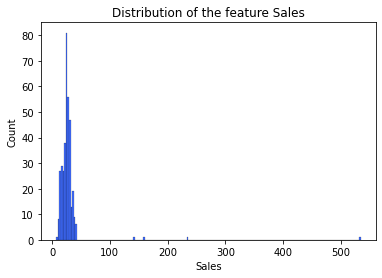

In [34]:
sns.set_palette("bright")
for col in lemonade.select_dtypes(np.number).columns:
    figure = plt.figure
    ax = plt.gca()
    sns.histplot(lemonade[col])
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_title("Distribution of the feature {}".format(col))

    plt.show()

`Temperature`, `Rainfall`, `Flyers`, and `Sales` are roughly normally distributed. 

In [40]:
normal_features = ['Temperature', 'Rainfall', 'Flyers', 'Sales']
outliers = {}
for col in normal_features:
    outliers[col] = lemonade[(lemonade[col] < lemonade[col].mean() - 2*lemonade[col].std()) | (lemonade[col] > lemonade[col].mean() + 2*lemonade[col].std())]

In [41]:
outliers

{'Temperature':          Date       Day  Temperature  Rainfall  Flyers  Price  Sales
 41    2/11/17  Saturday        212.0      0.91      35    0.5     21
 166   6/16/17    Friday         99.3      0.47      77    0.5     41
 176   6/26/17    Monday        102.6      0.47      60    0.5     42
 181    7/1/17  Saturday        102.9      0.47      59    0.5    143
 190   7/10/17    Monday         98.0      0.49      66    0.5     40
 198   7/18/17   Tuesday         99.3      0.47      76    0.5     41
 202   7/22/17  Saturday         99.6      0.47      49    0.5     42
 207   7/27/17  Thursday         97.9      0.47      74    0.5     43
 338   12/5/17   Tuesday         22.0      1.82      11    0.5     10
 364  12/31/17    Sunday         15.1      2.50       9    0.5      7,
 'Rainfall':          Date        Day  Temperature  Rainfall  Flyers  Price  Sales
 0      1/1/17     Sunday         27.0      2.00      15    0.5     10
 5      1/6/17     Friday         25.3      1.54      23    

The two sigma rule has given us outliers for every one of our normal features.

In [42]:
outliers['Temperature']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


The only `Temperature` outlier that doesn't make sense is the 212.0 temperature.

In [43]:
outliers['Rainfall']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


None of the `Rainfall` features are unreasonable.

In [44]:
outliers['Flyers']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


The only value for `Flyers` that doesn't make sense is -38. 

In [45]:
outliers['Sales']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


The `Sale` amount 534 seems far-fetched, but its not impossible. 

The indices I will remove is 41 and 324.

## Part 3 

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`.

In [46]:
outliers = {}
for col in normal_features:
    outliers[col] = lemonade[(lemonade[col] < lemonade[col].mean() - 3*lemonade[col].std()) | (lemonade[col] > lemonade[col].mean() + 3*lemonade[col].std())]

In [47]:
outliers

{'Temperature':        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
 41  2/11/17  Saturday        212.0      0.91      35    0.5     21,
 'Rainfall':          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
 0      1/1/17   Sunday         27.0      2.00      15    0.5     10
 15    1/16/17   Monday         30.6      1.67      24    0.5     12
 338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
 343  12/10/17   Sunday         31.3      1.82      15    0.5     11
 364  12/31/17   Sunday         15.1      2.50       9    0.5      7,
 'Flyers':          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
 324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20,
 'Sales':        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
 181  7/1/17  Saturday        102.9      0.47      59    0.5    143
 182  7/2/17    Sunday         93.4      0.51      68    0.5    158
 183  7/3/17    Monday         81.5      0.54      68    0.

All of our normal features have outliers using the 3 sigma rule.

In [48]:
outliers['Temperature']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


This `Temperature` value is not possible and should definitely be removed.

In [49]:
outliers['Rainfall']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


None of the `Rainfall` values are unreasonable. 

In [50]:
outliers['Flyers']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


Negative `Flyers` doesn't make any sense and should be removed.

In [51]:
outliers['Sales']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


None of the `Sales` values are unreasonable.